In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wasila_matrix.csv')
updated_names = df.updated_names.values
taxa = np.unique(df.taxa.values)
family = np.unique(df.family.values)
genera = np.unique(np.array([sp.split(' ')[0] for sp in taxa]))

In [3]:
df[['taxa', 'family']].to_csv('identification_species_family.csv', index=False)

### There are few taxa that have been annotated multiple times.

In [4]:
# Counting the frequency of each unique taxa in taxa_all
taxa_frequency = {taxa_: df.taxa.values.tolist().count(taxa_) for taxa_ in taxa}
print("********************The multi-annotated taxa are********************")
for taxa_ in taxa_frequency:
    if taxa_frequency[taxa_] != 1:
        print(f'\033[1m{taxa_}\033[0m', 'annotated',taxa_frequency[taxa_], 'times.')

********************The multi-annotated taxa are********************
Campostoma anomalum annotated 2 times.
Erimyzon oblongus annotated 2 times.
Hybognathus hankinsoni annotated 2 times.
Hybognathus nuchalis annotated 2 times.
Hybopsis amblops annotated 2 times.
Notropis blennius annotated 2 times.
Notropis buccatus annotated 2 times.
Notropis chalybaeus annotated 2 times.
Notropis dorsalis annotated 2 times.
Notropis heterodon annotated 2 times.
Notropis heterolepis annotated 2 times.
Notropis hudsonius annotated 2 times.
Phoxinus neogaeus annotated 2 times.
Rutilus rutilus annotated 2 times.


In [5]:
import matplotlib.pyplot as plt

# Recalculating the total counts for each category
total_taxa_count = taxa.shape[0]
total_genera_count = genera.shape[0]
total_family_count = family.shape[0]

# Categories and their respective counts
categories = ['Species', 'Genera', 'Family']
counts = [total_taxa_count, total_genera_count, total_family_count]

Matplotlib created a temporary config/cache directory at /localscratch-ssd/247372/matplotlib-hphoa0x7 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


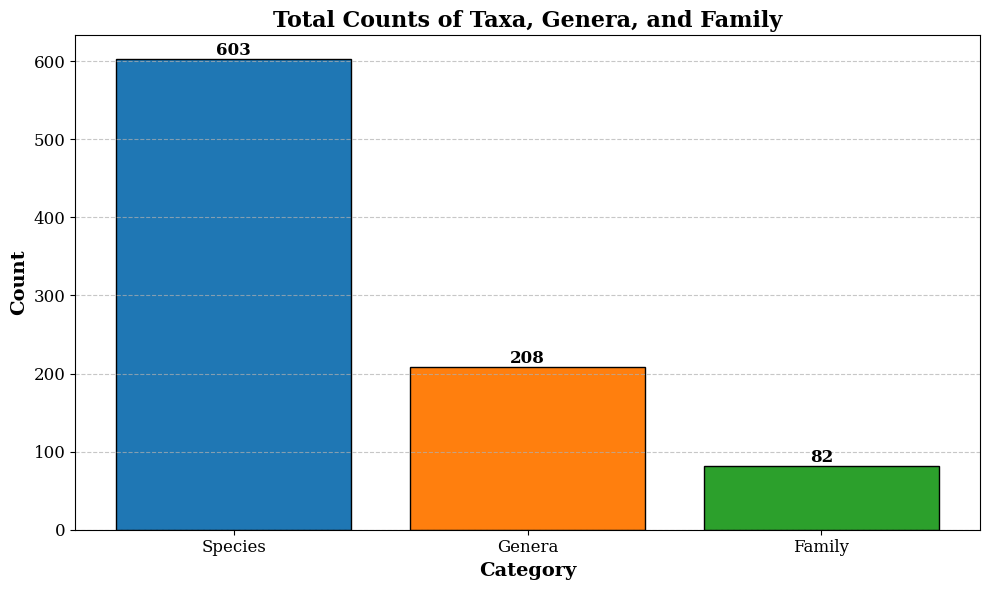

In [6]:
import matplotlib.ticker as mticker

# Enhanced plot settings for a professional look
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

# Adding count labels with enhanced styling
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontname='serif', fontsize=12, color='black', fontweight='bold')

# Setting up the plot with professional aesthetics
plt.title('Total Counts of Taxa, Genera, and Family', fontname='serif', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontname='serif', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontname='serif', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontname='serif')
plt.yticks(fontsize=12, fontname='serif')

# Format y-axis to display whole numbers only
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()
